In [20]:
!open .

In [1]:
import mido
from mido import MidiFile

In [2]:
file = MidiFile('data/Midi #8.mid')

In [3]:
message = mido.Message('program_change', program=10)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
notes = []
for message in file:
    print(message)
    try:
        notes.append(message.note)
    except AttributeError:
        pass
    
    #plt.plot()
    

<meta message set_tempo tempo=468750 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message track_name name='Nexus Lead 1' time=0>
note_on channel=0 note=43 velocity=100 time=0
note_on channel=0 note=31 velocity=100 time=0
note_on channel=0 note=67 velocity=100 time=0
note_off channel=0 note=67 velocity=64 time=0.05859375
note_on channel=0 note=67 velocity=100 time=0.64453125
note_off channel=0 note=67 velocity=64 time=0.234375
note_on channel=0 note=69 velocity=100 time=0.3515625
note_off channel=0 note=69 velocity=64 time=0.1171875
note_on channel=0 note=70 velocity=100 time=0.234375
note_off channel=0 note=70 velocity=64 time=0.1171875
note_off channel=0 note=43 velocity=64 time=0.1171875
note_off channel=0 note=31 velocity=64 time=0
note_on channel=0 note=46 velocity=100 time=0.234375
note_on channel=0 note=34 velocity=100 time=0
note_on channel=0 note=67 velocity=100 time=0
note_off channel=0 note=67 v

In [19]:
notes

[43,
 31,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 43,
 31,
 46,
 34,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 46,
 34,
 36,
 48,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 69,
 69,
 36,
 48,
 50,
 38,
 67,
 67,
 67,
 67,
 70,
 70,
 69,
 69,
 70,
 70,
 69,
 69,
 67,
 67,
 50,
 38,
 43,
 31,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 43,
 31,
 46,
 34,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 46,
 34,
 41,
 53,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 67,
 69,
 69,
 70,
 70,
 69,
 69,
 41,
 53,
 67,
 50,
 38,
 67,
 67,
 67,
 50,
 38,
 53,
 41,
 70,
 70,
 69,
 69,
 70,
 70,
 69,
 69,
 67,
 67,
 53,
 41]

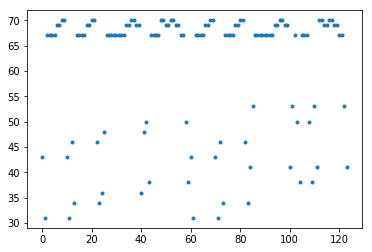

In [6]:
plt.plot(notes,'.')

In [7]:
import keras

Using TensorFlow backend.


In [8]:
lstm = keras.layers.LSTM(1)

In [9]:
model = keras.Sequential()

In [10]:
network_input = np.array(notes)

In [11]:
model.add(keras.layers.LSTM(13,
        input_shape=(13,1)
    ))

In [12]:
model.add(keras.layers.Activation('softmax'))

In [13]:
model.compile(loss='hinge', optimizer='sgd')

In [28]:
sequence_length = 13
# get all pitch names
pitchnames = sorted(set(item for item in notes))
# create a dictionary to map pitches to integers
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
network_input = []
network_output = []
# create input sequences and the corresponding outputs
for i in range(0, len(notes) - sequence_length, 1):
    sequence_in = notes[i:i + sequence_length]
    sequence_out = notes[i + sequence_length]

    network_input.append([note_to_int[char] for char in sequence_in])
    network_output.append(note_to_int[sequence_out])
n_patterns = len(network_input)
# reshape the input into a format compatible with LSTM layers
network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
# normalize input
# network_input = network_input / float(n_vocab)
network_output = keras.utils.to_categorical(network_output)

In [33]:
model.fit(network_input, network_output, epochs=200)

Epoch 1/200
111/111 [==============================] - 0s 688us/step - loss: 0.9916
Epoch 2/200
111/111 [==============================] - 0s 638us/step - loss: 0.9916
Epoch 3/200
111/111 [==============================] - 0s 645us/step - loss: 0.9916
Epoch 4/200
111/111 [==============================] - 0s 611us/step - loss: 0.9916
Epoch 5/200
111/111 [==============================] - 0s 609us/step - loss: 0.9916
Epoch 6/200
111/111 [==============================] - 0s 602us/step - loss: 0.9916
Epoch 7/200
111/111 [==============================] - 0s 728us/step - loss: 0.9916
Epoch 8/200
111/111 [==============================] - 0s 630us/step - loss: 0.9916
Epoch 9/200
111/111 [==============================] - 0s 611us/step - loss: 0.9916
Epoch 10/200
111/111 [==============================] - 0s 668us/step - loss: 0.9916
Epoch 11/200
111/111 [==============================] - 0s 853us/step - loss: 0.9916
Epoch 12/200
111/111 [==============================] - 0s 723us/step - lo

111/111 [==============================] - 0s 813us/step - loss: 0.9914
Epoch 98/200
111/111 [==============================] - 0s 908us/step - loss: 0.9914
Epoch 99/200
111/111 [==============================] - 0s 638us/step - loss: 0.9914
Epoch 100/200
111/111 [==============================] - 0s 575us/step - loss: 0.9914
Epoch 101/200
111/111 [==============================] - 0s 562us/step - loss: 0.9914
Epoch 102/200
111/111 [==============================] - 0s 637us/step - loss: 0.9914
Epoch 103/200
111/111 [==============================] - 0s 573us/step - loss: 0.9914
Epoch 104/200
111/111 [==============================] - 0s 552us/step - loss: 0.9914
Epoch 105/200
111/111 [==============================] - 0s 972us/step - loss: 0.9914
Epoch 106/200
111/111 [==============================] - 0s 1ms/step - loss: 0.9914
Epoch 107/200
111/111 [==============================] - 0s 1ms/step - loss: 0.9914
Epoch 108/200
111/111 [==============================] - 0s 691us/step - l

111/111 [==============================] - 0s 729us/step - loss: 0.9913
Epoch 193/200
111/111 [==============================] - 0s 615us/step - loss: 0.9913
Epoch 194/200
111/111 [==============================] - 0s 595us/step - loss: 0.9913
Epoch 195/200
111/111 [==============================] - 0s 786us/step - loss: 0.9913
Epoch 196/200
111/111 [==============================] - 0s 738us/step - loss: 0.9913
Epoch 197/200
111/111 [==============================] - 0s 595us/step - loss: 0.9913
Epoch 198/200
111/111 [==============================] - 0s 583us/step - loss: 0.9913
Epoch 199/200
111/111 [==============================] - 0s 605us/step - loss: 0.9913
Epoch 200/200
111/111 [==============================] - 0s 803us/step - loss: 0.9913


## 

In [20]:
import os
import mido
import numpy as np
from mido import MidiFile

def getAllFeatureVectors():
   rootdir = os.getcwd() + '/data/'
   
   featureVectors = []
   i = 0
   for subdir, dirs, files in os.walk(rootdir):
       for file in files:
           midiFileName = os.path.join(subdir, file)
           #print os.path.join(subdir, file)
           if (not midiFileName.endswith('.mid')):
               continue
           featureVectors.append(getFeatureVector(midiFileName))
           i+=1
           
   # Convert to numpy arrays
   return np.array(featureVectors)
           
def getFeatureVector(midiFileName):
   file = MidiFile(midiFileName)
   
   features = []
   
   i = 0
   timeSinceStart = 0.0
   for message in file:
       
       (newFeatureVect, timeSinceStart) = processMessage(message, timeSinceStart)
       if (type(newFeatureVect) is list):
           features.append(newFeatureVect)
           i += 1
       
   return features
       
def processMessage(m, timeSinceStart):
   vector = []
   
   if (type(m.time) is float or type(m.time) is int):
       timeSinceStart += m.time
   
   if (m.type in ['note_on', 'note_off']):
       
       on = 1
       if (m.type == 'note_off'):
           on = 0
       
       vector = [on, m.channel, m.note, m.velocity, timeSinceStart]
       return (vector, timeSinceStart)
   else:
       return (None, timeSinceStart)
   
   
featureVectors = getAllFeatureVectors()